In [1]:
! which python

/mnt/d/School/MUNI_Mgr/master-thesis/vysledky/master-results/venv/bin/python


# Summary of results
and analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
pd.__version__

'1.4.2'

In [3]:
pd.__path__

['/Users/marek/Documents/school/masters/vysledky/venv/lib/python3.8/site-packages/pandas']

In [4]:
def are_equal_steps(column):
    size = len(column)
    for i in range(size):
        for j in range(size):
            column[i].sort()
            column[j].sort()
            if column[i] != column[j]:
                return False
    return True

In [33]:
def create_frame(df, title, name,isLoss: bool =False,stepCols=True,fixRange=None):
    data = df.copy()
    if not are_equal_steps(data.x):
        print("Set has different steps")
        return
    
    steps = pd.DataFrame(data.x[0],columns=["step"])
    
    data = data[['y','name']].transpose()
    data = data.rename(columns=data.iloc[1])
    data = data.iloc[:1]
    data = data.apply(lambda x: x.explode(),axis=0).reset_index(drop=True)
    data = pd.concat([steps,data],axis=1)
    
    if stepCols:
        new_cols = [re.sub(r'[^0-9]*(\d+).*', r'\g<1>', i) for i in data.columns]
        mapping = {i:j for i,j in zip(data.columns, new_cols)}
        data = data.rename(columns=mapping)
    
    data = data[data.iloc[-1].sort_values(ascending=False).index] # order 

    fig, axs = plt.subplots(figsize=(10,10), tight_layout=True)        # Create an empty matplotlib Figure and Axes
#     print(data.columns)
    
    n = len(data.columns)

#     colors = plt.cm.viridis(np.linspace(0,1,n,endpoint=True)[1:])
#     colors = plt.cm.YlGnBu(np.linspace(0,1,n,endpoint=True)[1:])
    colors = plt.cm.YlOrRd(np.linspace(0,1,n,endpoint=True)[1:])

    arr = np.delete(data.columns.values, np.argwhere(data.columns.values == "step"))
    print(arr)
    
    if stepCols and len(arr) != 1:
        arr = arr.astype('int')
        
    arr.sort()
    print(arr)
    mapping = { str(arr[i]):colors[i] for i in range(len(arr))}

    data.plot.line(x='step',ax=axs, color=mapping)      # Use pandas to put the area plot on the prepared Figure/Axes
    
    ylabel = "BLEU"
    if isLoss:
        ylabel = "Loss"
        
    axs.set_ylabel(ylabel,fontsize=20) 
    
    axs.set_xlabel('step',fontsize=20)
    axs.set_title(title,fontsize=20)
    axs.tick_params(axis='both', which='major', labelsize=15)
#     axs.tick_params(axis='both', which='minor', labelsize=50)
    
    fig.tight_layout()
    fig.savefig(name,bbox_inches='tight',facecolor='white', transparent=False)
    
    return data

In [26]:
df = pd.read_json("tradeoff_train-tune_v2.json",orient="values")

In [27]:
train = df.iloc[:1].reset_index(drop=True)
tune = df.iloc[1:].reset_index(drop=True)

In [28]:
import re
[re.sub(r'.*-([1-90]{2})([0]{1}).*', r'\g<1>', i) for i in tune.columns]

['x', 'y', 'type', 'name']

In [29]:
train

,x,y,type,name
0,"[5000, 10000, 15000, 20000, 25000, 30000, 3500...","[20.5019, 28.7255, 30.6206, 33.3194, 33.2228, ...",scattergl,FP train EuPar...


In [30]:
tune

,x,y,type,name
0,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[29.7682, 30.4435, 32.0055, 31.7798, 31.8988, ...",scattergl,15000 trainedF...
1,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[22.0309, 24.6161, 26.6305, 27.2412, 27.9968, ...",scattergl,5000 trainedFP...
2,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[28.2657, 28.9223, 29.4362, 30.0933, 30.3835, ...",scattergl,10000 trainedF...
3,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[31.9195, 32.2154, 33.0028, 33.7596, 33.4409, ...",scattergl,30000 trainedF...
4,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[31.1724, 32.4103, 31.5746, 33.2719, 33.2627, ...",scattergl,20000 trainedF...
5,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[31.8541, 31.7008, 32.655, 32.5093, 33.9599, 3...",scattergl,25000 trainedF...
6,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[32.972, 33.5418, 34.2742, 33.8666, 35.1629, 3...",scattergl,45000 trainedF...
7,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[32.9868, 33.5081, 33.5432, 34.084, 33.7076, 3...",scattergl,35000 trainedF...
8,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[32.9373, 32.6581, 32.8254, 33.3535, 34.0537, ...",scattergl,40000 trainedF...
9,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[33.1549, 33.8757, 35.4615, 34.715, 34.6347, 3...",scattergl,60000 trainedF...


['70000' '50000' '65000' '95000' '80000' '35000' '55000' '45000' '60000'
 '90000' '40000' '85000' '75000' '100000' '15000' '25000' '30000' '20000'
 '10000' '5000']
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000]


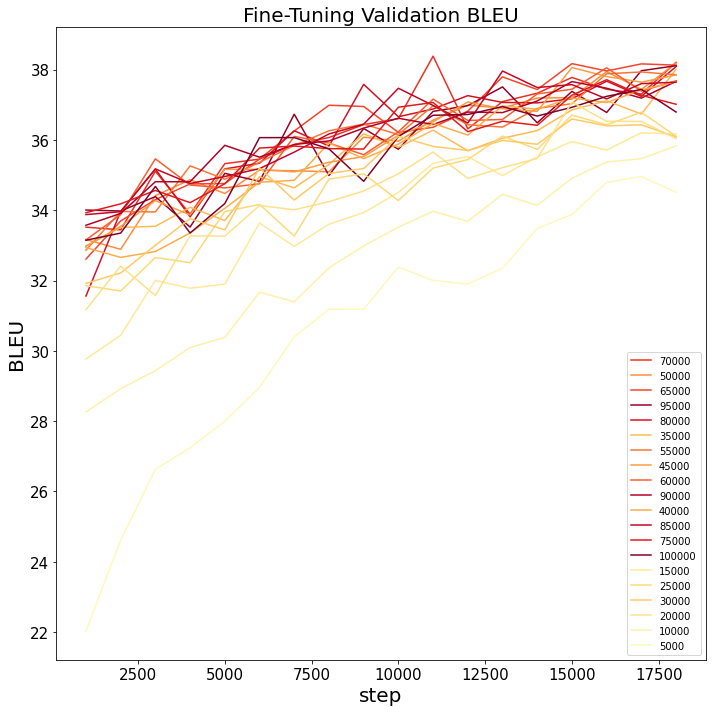

In [34]:
_ = create_frame(tune,"Fine-Tuning Validation BLEU",'tradeoff_FT_bleu.png')

In [21]:
df = train
title = "Fine-Tuning Validation BLEU"
name ='tradeoff_FT_bleu.png'
isLoss = False


data = df.copy()
if not are_equal_steps(data.x):
    print("Set has different steps")
#     return

steps = pd.DataFrame(data.x[0],columns=["step"])

data = data[['y','name']].transpose()
data = data.rename(columns=data.iloc[1])
data = data.iloc[:1]
data = data.apply(lambda x: x.explode(),axis=0).reset_index(drop=True)
data = pd.concat([steps,data],axis=1)

new_cols = [re.sub(r'[^0-9]*(\d+).*', r'\g<1>', i) for i in data.columns]
mapping = {i:j for i,j in zip(data.columns, new_cols)}
data = data.rename(columns=mapping)

data = data[data.iloc[-1].sort_values(ascending=False).index] # order 

In [22]:
data

,step,FP train EuPar...
0,5000,20.5019
1,10000,28.7255
2,15000,30.6206
3,20000,33.3194
4,25000,33.2228
5,30000,34.4038
6,35000,35.2229
7,40000,35.5564
8,45000,35.9221
9,50000,36.1961


Index(['step', 'FP train EuPar...'], dtype='object')
[[1. 0. 1. 1.]]


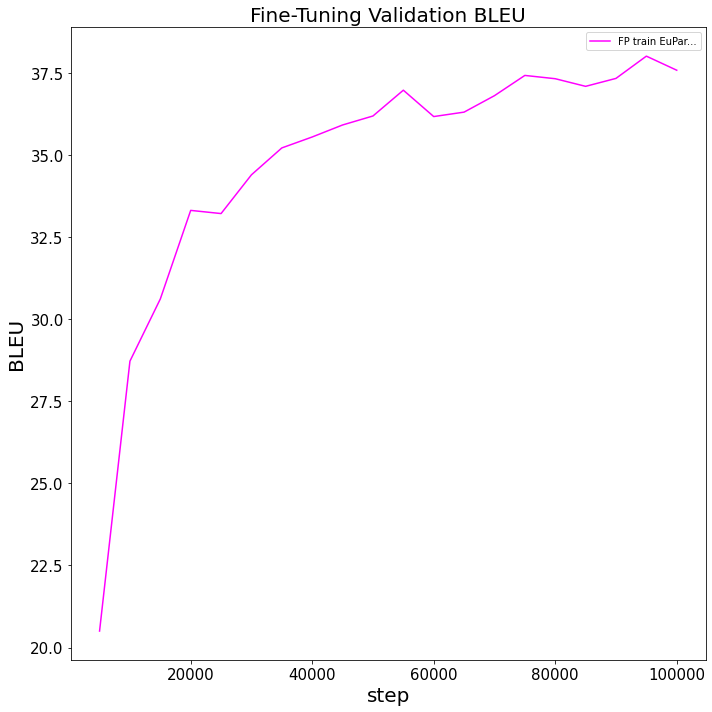

In [218]:
fig, axs = plt.subplots(figsize=(10,10), tight_layout=True)        # Create an empty matplotlib Figure and Axes
print(data.columns)

n = len(data.columns)

colors = plt.cm.cool(np.linspace(0,1,n,endpoint=True)[1:])


arr = np.delete(data.columns.values, np.argwhere(data.columns.values == "step"))
hasSteps = False
if hasSteps and n != 1:
    arr = arr.astype('int')
arr.sort()

print(colors)
mapping = { str(arr[i]):colors[i] for i in range(len(arr))}

data.plot.line(x='step',ax=axs, color=mapping)                  # Use pandas to put the area plot on the prepared Figure/Axes

ylabel = "BLEU"
if isLoss:
    ylabel = "Loss"

axs.set_ylabel(ylabel,fontsize=20) 

axs.set_xlabel('step',fontsize=20)
axs.set_title(title,fontsize=20)
axs.tick_params(axis='both', which='major', labelsize=15)
#     axs.tick_params(axis='both', which='minor', labelsize=50)

fig.tight_layout()
fig.savefig(name,bbox_inches='tight',facecolor='white', transparent=False)

In [216]:
np.linspace(0,1,4,endpoint=True)[1:]

array([0.33333333, 0.66666667, 1.        ])

In [173]:
plt.show()

['FP train EuPar...']
['FP train EuPar...']


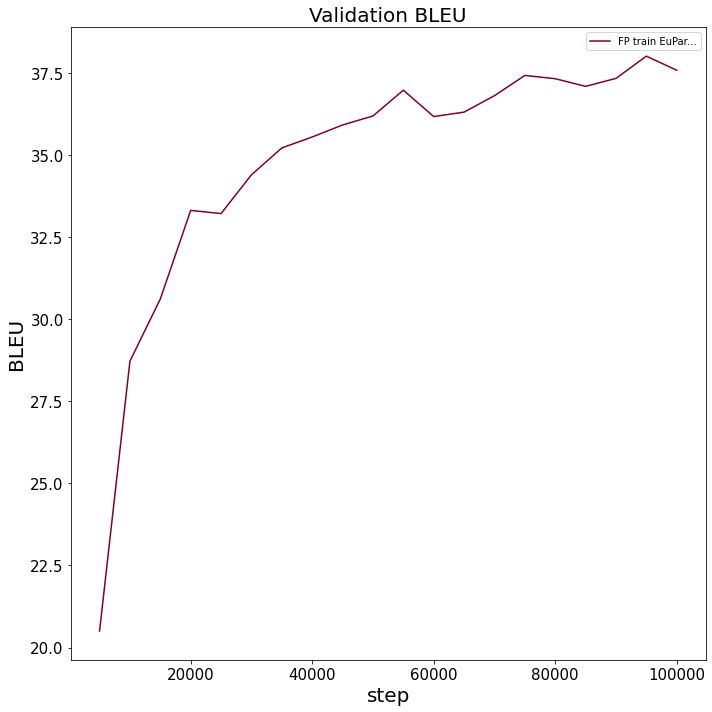

In [35]:
_ = create_frame(train,"Validation BLEU",'tradeoff_train_val_bleu.png',False)

## Analysis of rank - Is resulting BLEU dependant on starting step? (should be)

<AxesSubplot:xlabel='model', ylabel='last'>

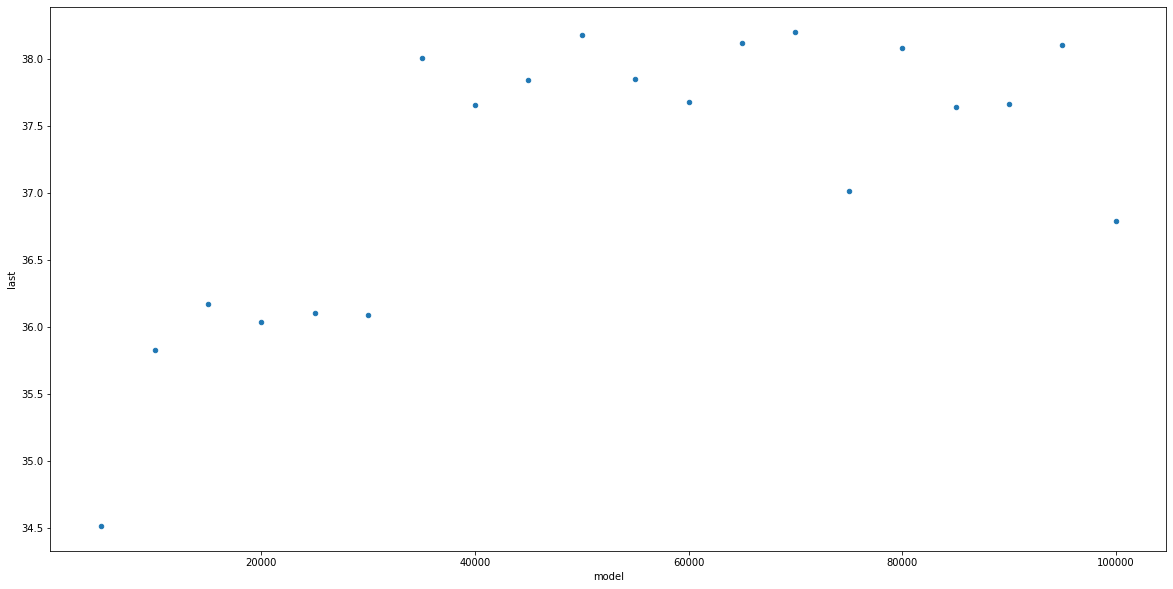

In [224]:
last = tune.iloc[-1:,:].transpose()
# last.index.name = "model"
last = last.reset_index()
last = last.set_axis(['model','last'],axis=1)[1:]
last.model = last.model.astype("int")
last.sort_values(by="model",ascending=True).plot.scatter(x="model",y="last",figsize=(20,10))

In [225]:
last

,model,last
1,70000,38.2058
2,50000,38.1863
3,65000,38.1261
4,95000,38.1106
5,80000,38.0877
6,35000,38.0071
7,55000,37.8523
8,45000,37.8477
9,60000,37.6797
10,90000,37.6651


In [226]:
trans = tune.transpose()
trans = trans.iloc[1:]
new = pd.DataFrame()
new['last'] = trans.iloc[:,-1:]
# trans['max'] = 
new['max'] = trans.max(axis=1)
new['last_order'] = new['last'].rank(axis=0,method='average')
new['max_order'] = new['max'].rank(axis=0,method='average')
new

,last,max,last_order,max_order
70000,38.2058,38.3818,20.0,20.0
50000,38.1863,38.1863,19.0,19.0
65000,38.1261,38.1686,18.0,18.0
95000,38.1106,38.1106,17.0,17.0
80000,38.0877,38.0877,16.0,16.0
35000,38.0071,38.0071,15.0,13.0
55000,37.8523,37.9313,14.0,11.0
45000,37.8477,38.0582,13.0,15.0
60000,37.6797,38.0511,12.0,14.0
90000,37.6651,37.6651,11.0,9.0


# Out-of-Domain analysis

In [36]:
df = pd.read_json("tradeoff_in_out_of_domain_robustness_chart_data.json",orient="values")

In [37]:
df

,x,y,type,name
0,"[5000, 10000, 15000, 20000, 25000, 30000, 3500...","[20.5019, 28.7255, 30.6206, 33.3194, 33.2228, ...",scattergl,eval_bleu (FP train EuPar...)
1,"[5000, 10000, 15000, 20000, 25000, 30000, 3500...","[3.7030000000000003, 7.1093, 6.8745, 6.9431, 7...",scattergl,trainEuParlFP_OpenSubs_eval_bleu (FP train EuP...
2,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[29.7682, 30.4435, 32.0055, 31.7798, 31.8988, ...",scattergl,eval_bleu (15000 trainedF...)
3,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[6.2903, 6.2575, 6.6443, 7.2797, 7.1242, 7.593...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
4,[0],[6.8745],scattergl,trainEuParlFP_OpenSubs_eval_bleu (15000 traine...
...,...,...,...,...
57,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[8.0828, 8.0511, 8.0728, 8.0681, 7.5265, 8.574...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
58,[0],[9.0043],scattergl,trainEuParlFP_OpenSubs_eval_bleu (100000 train...
59,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[34.005, 33.9779, 34.3866, 33.5209, 35.0484, 3...",scattergl,eval_bleu (95000 trainedF...)
60,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[8.3672, 8.1072, 8.6016, 8.3907, 8.9086, 8.770...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...


In [38]:
df = df.iloc[2:]
df

,x,y,type,name
2,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[29.7682, 30.4435, 32.0055, 31.7798, 31.8988, ...",scattergl,eval_bleu (15000 trainedF...)
3,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[6.2903, 6.2575, 6.6443, 7.2797, 7.1242, 7.593...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
4,[0],[6.8745],scattergl,trainEuParlFP_OpenSubs_eval_bleu (15000 traine...
5,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[22.0309, 24.6161, 26.6305, 27.2412, 27.9968, ...",scattergl,eval_bleu (5000 trainedFP...)
6,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[4.7382, 4.2563, 5.3015, 5.7228, 6.8726, 6.621...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
7,[0],[3.7030000000000003],scattergl,trainEuParlFP_OpenSubs_eval_bleu (5000 trained...
8,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[28.2657, 28.9223, 29.4362, 30.0933, 30.3835, ...",scattergl,eval_bleu (10000 trainedF...)
9,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[6.5562000000000005, 6.1637, 5.043, 7.3669, 6....",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
10,[0],[7.1093],scattergl,trainEuParlFP_OpenSubs_eval_bleu (10000 traine...
11,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[31.9195, 32.2154, 33.0028, 33.7596, 33.4409, ...",scattergl,eval_bleu (30000 trainedF...)


In [39]:
df[df.name.str.contains('fineTuneEuParlQAT')]

,x,y,type,name
3,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[6.2903, 6.2575, 6.6443, 7.2797, 7.1242, 7.593...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
6,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[4.7382, 4.2563, 5.3015, 5.7228, 6.8726, 6.621...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
9,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[6.5562000000000005, 6.1637, 5.043, 7.3669, 6....",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
12,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.0257, 7.1114, 7.6541, 7.2003, 7.471, 7.9901...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
15,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.2329, 6.0669, 6.7681000000000004, 8.0338, 8...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
18,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.7958, 6.8705, 6.7437000000000005, 7.4594000...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
21,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.2071, 7.8258, 7.1281, 8.8165, 8.5471, 8.911...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
24,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.4396, 8.4641, 8.1851, 8.0128, 8.0122, 7.865...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
27,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.1015, 8.4809, 7.2852, 8.411, 9.2077, 7.3147...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
30,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.6455, 7.7478, 7.7878, 8.532, 8.558, 8.5895,...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...


In [40]:
train = df.iloc[:1].reset_index(drop=True)
tune = df.iloc[1:].reset_index(drop=True)

In [41]:
tune

,x,y,type,name
0,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[6.2903, 6.2575, 6.6443, 7.2797, 7.1242, 7.593...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
1,[0],[6.8745],scattergl,trainEuParlFP_OpenSubs_eval_bleu (15000 traine...
2,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[22.0309, 24.6161, 26.6305, 27.2412, 27.9968, ...",scattergl,eval_bleu (5000 trainedFP...)
3,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[4.7382, 4.2563, 5.3015, 5.7228, 6.8726, 6.621...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
4,[0],[3.7030000000000003],scattergl,trainEuParlFP_OpenSubs_eval_bleu (5000 trained...
5,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[28.2657, 28.9223, 29.4362, 30.0933, 30.3835, ...",scattergl,eval_bleu (10000 trainedF...)
6,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[6.5562000000000005, 6.1637, 5.043, 7.3669, 6....",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
7,[0],[7.1093],scattergl,trainEuParlFP_OpenSubs_eval_bleu (10000 traine...
8,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[31.9195, 32.2154, 33.0028, 33.7596, 33.4409, ...",scattergl,eval_bleu (30000 trainedF...)
9,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.0257, 7.1114, 7.6541, 7.2003, 7.471, 7.9901...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...


In [42]:
# tune = tune[tune.name.str.contains('OpenSubs')].reset_index(drop=True)
tune = df[df.name.str.contains('fineTuneEuParlQAT')].reset_index(drop=True)
tune

,x,y,type,name
0,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[6.2903, 6.2575, 6.6443, 7.2797, 7.1242, 7.593...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
1,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[4.7382, 4.2563, 5.3015, 5.7228, 6.8726, 6.621...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
2,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[6.5562000000000005, 6.1637, 5.043, 7.3669, 6....",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
3,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.0257, 7.1114, 7.6541, 7.2003, 7.471, 7.9901...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
4,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.2329, 6.0669, 6.7681000000000004, 8.0338, 8...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
5,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.7958, 6.8705, 6.7437000000000005, 7.4594000...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
6,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.2071, 7.8258, 7.1281, 8.8165, 8.5471, 8.911...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
7,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.4396, 8.4641, 8.1851, 8.0128, 8.0122, 7.865...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
8,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.1015, 8.4809, 7.2852, 8.411, 9.2077, 7.3147...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
9,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.6455, 7.7478, 7.7878, 8.532, 8.558, 8.5895,...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...


['90000' '60000' '75000' '100000' '40000' '95000' '30000' '50000' '85000'
 '65000' '70000' '45000' '25000' '55000' '80000' '35000' '20000' '15000'
 '10000' '5000']
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000]


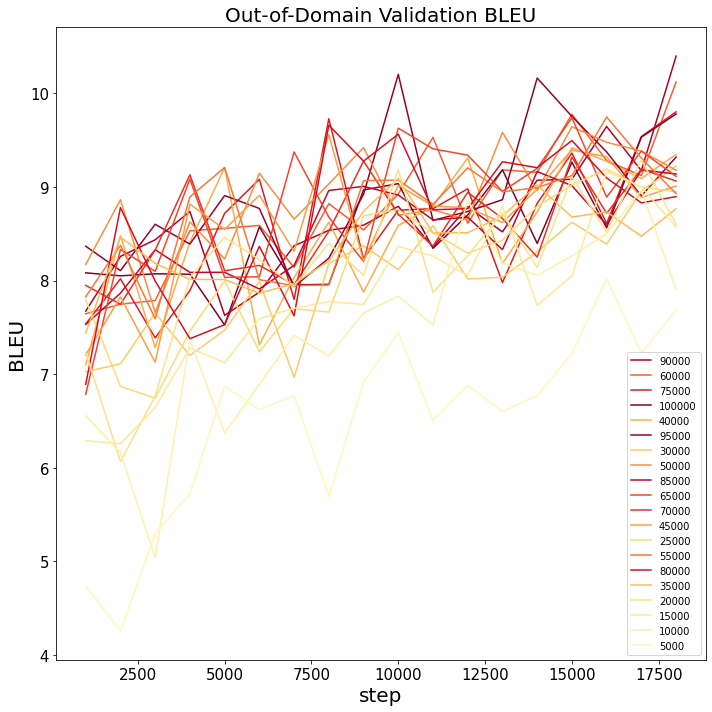

In [43]:
tune = create_frame(tune, "Out-of-Domain Validation BLEU","out-ft_eval_bleu.png")

## In/Out comparison of drop

In [280]:
df = pd.read_json("tradeoff_in_out_of_domain_robustness_chart_data.json",orient="values")
df = df.iloc[2:]
df['last'] = df.y.apply(lambda x: x[-1])
df = df[df.x.apply(lambda x: len(x)) != 1]
df

,x,y,type,name,last
2,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[29.7682, 30.4435, 32.0055, 31.7798, 31.8988, ...",scattergl,eval_bleu (15000 trainedF...),36.1691
3,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[6.2903, 6.2575, 6.6443, 7.2797, 7.1242, 7.593...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,8.5761
5,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[22.0309, 24.6161, 26.6305, 27.2412, 27.9968, ...",scattergl,eval_bleu (5000 trainedFP...),34.5114
6,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[4.7382, 4.2563, 5.3015, 5.7228, 6.8726, 6.621...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,7.6843
8,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[28.2657, 28.9223, 29.4362, 30.0933, 30.3835, ...",scattergl,eval_bleu (10000 trainedF...),35.8298
9,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[6.5562000000000005, 6.1637, 5.043, 7.3669, 6....",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,7.9042
11,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[31.9195, 32.2154, 33.0028, 33.7596, 33.4409, ...",scattergl,eval_bleu (30000 trainedF...),36.0865
12,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.0257, 7.1114, 7.6541, 7.2003, 7.471, 7.9901...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,9.2236
14,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[31.1724, 32.4103, 31.5746, 33.2719, 33.2627, ...",scattergl,eval_bleu (20000 trainedF...),36.0379
15,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.2329, 6.0669, 6.7681000000000004, 8.0338, 8...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,8.6005


In [281]:
df['experiment'] = df.name.apply(lambda x: re.sub(r".*\((.*)\)",r"\g<1>",x))
df['experiment'] = df.experiment.apply(lambda x: re.sub(r"(\d+).*",r"\g<1>",x))
df['domain'] = df.name.apply(lambda x: "out" if re.search("OpenSubs",x)is not None else "in")
df.drop(['x','y','type'],axis=1,inplace=True)
ind = df[df.domain == 'in']
outd = df[df.domain == 'out']

In [282]:
mg = pd.merge(ind,outd,on="experiment")
mg

,name_x,last_x,experiment,domain_x,name_y,last_y,domain_y
0,eval_bleu (15000 trainedF...),36.1691,15000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,8.5761,out
1,eval_bleu (5000 trainedFP...),34.5114,5000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,7.6843,out
2,eval_bleu (10000 trainedF...),35.8298,10000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,7.9042,out
3,eval_bleu (30000 trainedF...),36.0865,30000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,9.2236,out
4,eval_bleu (20000 trainedF...),36.0379,20000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,8.6005,out
5,eval_bleu (25000 trainedF...),36.1015,25000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,8.9495,out
6,eval_bleu (45000 trainedF...),37.8477,45000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,9.0103,out
7,eval_bleu (35000 trainedF...),38.0071,35000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,8.7678,out
8,eval_bleu (40000 trainedF...),37.6583,40000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,9.3486,out
9,eval_bleu (60000 trainedF...),37.6797,60000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,10.1205,out


In [283]:
mg['abs_diff'] = mg.last_x - mg.last_y
mg['frc_diff'] = mg.last_y / mg.last_x
mg

,name_x,last_x,experiment,domain_x,name_y,last_y,domain_y,abs_diff,frc_diff
0,eval_bleu (15000 trainedF...),36.1691,15000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,8.5761,out,27.5930,0.237111
1,eval_bleu (5000 trainedFP...),34.5114,5000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,7.6843,out,26.8271,0.222660
2,eval_bleu (10000 trainedF...),35.8298,10000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,7.9042,out,27.9256,0.220604
3,eval_bleu (30000 trainedF...),36.0865,30000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,9.2236,out,26.8629,0.255597
4,eval_bleu (20000 trainedF...),36.0379,20000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,8.6005,out,27.4374,0.238652
5,eval_bleu (25000 trainedF...),36.1015,25000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,8.9495,out,27.1520,0.247898
6,eval_bleu (45000 trainedF...),37.8477,45000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,9.0103,out,28.8374,0.238067
7,eval_bleu (35000 trainedF...),38.0071,35000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,8.7678,out,29.2393,0.230688
8,eval_bleu (40000 trainedF...),37.6583,40000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,9.3486,out,28.3097,0.248248
9,eval_bleu (60000 trainedF...),37.6797,60000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,10.1205,out,27.5592,0.268593


In [284]:
mg.sort_values(by="frc_diff",ascending=True)

,name_x,last_x,experiment,domain_x,name_y,last_y,domain_y,abs_diff,frc_diff
2,eval_bleu (10000 trainedF...),35.8298,10000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,7.9042,out,27.9256,0.220604
1,eval_bleu (5000 trainedFP...),34.5114,5000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,7.6843,out,26.8271,0.222660
7,eval_bleu (35000 trainedF...),38.0071,35000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,8.7678,out,29.2393,0.230688
17,eval_bleu (80000 trainedF...),38.0877,80000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,8.8970,out,29.1907,0.233592
11,eval_bleu (55000 trainedF...),37.8523,55000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,8.9294,out,28.9229,0.235901
0,eval_bleu (15000 trainedF...),36.1691,15000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,8.5761,out,27.5930,0.237111
14,eval_bleu (70000 trainedF...),38.2058,70000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,9.0640,out,29.1418,0.237241
6,eval_bleu (45000 trainedF...),37.8477,45000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,9.0103,out,28.8374,0.238067
4,eval_bleu (20000 trainedF...),36.0379,20000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,8.6005,out,27.4374,0.238652
12,eval_bleu (65000 trainedF...),38.1261,65000,in,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...,9.1138,out,29.0123,0.239044


In [285]:
mg[['experiment','last_x','last_y','abs_diff','frc_diff']].round(2)

,experiment,last_x,last_y,abs_diff,frc_diff
0,15000,36.17,8.58,27.59,0.24
1,5000,34.51,7.68,26.83,0.22
2,10000,35.83,7.90,27.93,0.22
3,30000,36.09,9.22,26.86,0.26
4,20000,36.04,8.60,27.44,0.24
5,25000,36.10,8.95,27.15,0.25
6,45000,37.85,9.01,28.84,0.24
7,35000,38.01,8.77,29.24,0.23
8,40000,37.66,9.35,28.31,0.25
9,60000,37.68,10.12,27.56,0.27


In [286]:
mg[['experiment','last_x','last_y','abs_diff','frc_diff']].sort_values(by="frc_diff",ascending=True).round(2).to_csv("in_out_bleu_difference.csv",index=False)

In [287]:
df = pd.read_json("tradeoff_in_out_of_domain_robustness_chart_data.json",orient="values")
df = df.iloc[:2]
df['last'] = df.y.apply(lambda x: x[-1])
df['experiment'] = df.name.apply(lambda x: re.sub(r".*\((.*)\)",r"\g<1>",x))
df['domain'] = df.name.apply(lambda x: "out" if re.search("OpenSubs",x)is not None else "in")
df.drop(['x','y','type'],axis=1,inplace=True)
ind = df[df.domain == 'in']
outd = df[df.domain == 'out']
mg = pd.merge(ind,outd,on="experiment")
mg['abs_diff'] = mg.last_x - mg.last_y
mg['frc_diff'] = mg.last_y / mg.last_x
mg

,name_x,last_x,experiment,domain_x,name_y,last_y,domain_y,abs_diff,frc_diff
0,eval_bleu (FP train EuPar...),37.5903,FP train EuPar...,in,trainEuParlFP_OpenSubs_eval_bleu (FP train EuP...,9.0043,out,28.586,0.239538


In [288]:
mg[['experiment','last_x','last_y','abs_diff','frc_diff']].round(2).to_csv("in_out_fp_bleu_difference.csv",index=False)

## Infinite training

Domain - EuroParl https://huggingface.co/datasets/europarl_bilingual

Out-of-Domain = OpenSubtitles https://huggingface.co/datasets/open_subtitles

In [44]:
df = pd.read_json("infiniteTrain_in-out_eval_bleu.json",orient="values")

In [45]:
ind = df[df.name.str.contains("OpenSubs")==False].reset_index(drop=True)
ind.name = ['FP','QAT']
ind.x[1] = ind.x[1][:len(ind.x[0])]
ind.y[1] = ind.y[1][:len(ind.y[0])]
ind

,x,y,type,name
0,"[10000, 20000, 30000, 40000, 50000, 60000, 700...","[28.2617, 33.2132, 33.7765, 34.8359, 34.2526, ...",scattergl,FP
1,"[10000, 20000, 30000, 40000, 50000, 60000, 700...","[27.3087, 31.282, 32.5365, 32.8125, 34.5093, 3...",scattergl,QAT


In [46]:
outd = df[df.name.str.contains("OpenSubs")==True].reset_index(drop=True)
outd.name = ['FP','QAT']
outd.x[1] = outd.x[1][:len(outd.x[0])]
outd.y[1] = outd.y[1][:len(outd.y[0])]
outd

,x,y,type,name
0,"[10000, 20000, 30000, 40000, 50000, 60000, 700...","[5.2871, 7.7606, 7.3408, 8.8288, 8.5091, 7.620...",scattergl,FP
1,"[10000, 20000, 30000, 40000, 50000, 60000, 700...","[4.7963000000000005, 7.1941, 7.931, 7.7873, 8....",scattergl,QAT


['QAT' 'FP']
['FP' 'QAT']


,step,QAT,FP
0,10000,27.3087,28.2617
1,20000,31.282,33.2132
2,30000,32.5365,33.7765
3,40000,32.8125,34.8359
4,50000,34.5093,34.2526
...,...,...,...
60,610000,37.7876,35.8689
61,620000,36.555,35.7384
62,630000,37.1462,35.6286
63,640000,36.6257,35.861


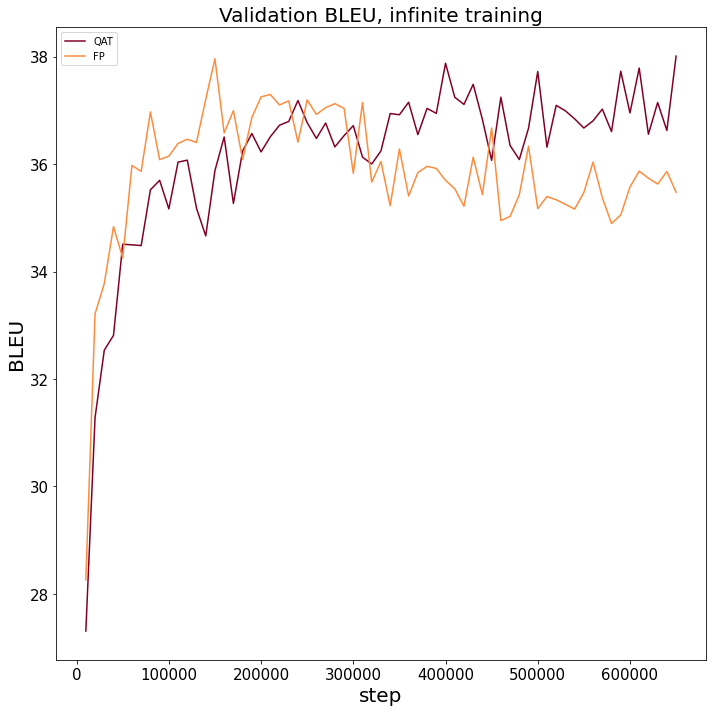

In [47]:
create_frame(ind,"Validation BLEU, infinite training","infinite_train_in-domain_eval_bleu.png",stepCols=False)

['QAT' 'FP']
['FP' 'QAT']


,step,QAT,FP
0,10000,4.7963,5.2871
1,20000,7.1941,7.7606
2,30000,7.931,7.3408
3,40000,7.7873,8.8288
4,50000,8.7864,8.5091
...,...,...,...
60,610000,10.3089,9.3239
61,620000,9.3268,8.5362
62,630000,9.7811,8.4231
63,640000,9.981,8.0583


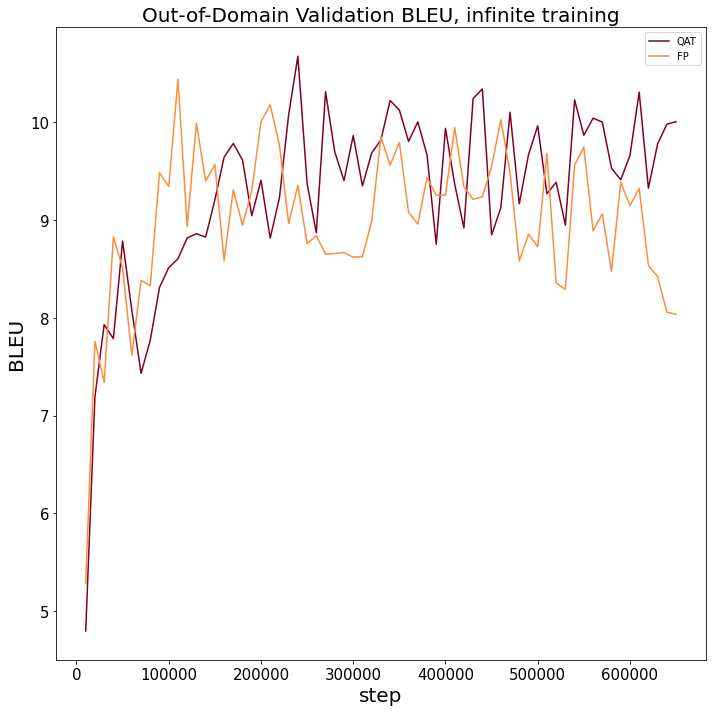

In [48]:
create_frame(outd,"Out-of-Domain Validation BLEU, infinite training","infinite_train_out-domain_eval_bleu.png",stepCols=False)

In [49]:
df = pd.read_json("infiniteTrain_in-out_eval_loss.json",orient="values")

In [50]:
df

,x,y,type,name
0,"[10000, 20000, 30000, 40000, 50000, 60000, 700...","[1.722022056579589, 1.40396773815155, 1.309202...",scattergl,eval_loss (FP train EuPar...)
1,"[10000, 20000, 30000, 40000, 50000, 60000, 700...","[4.548717975616455, 4.160565376281738, 4.08021...",scattergl,trainEuParlFP_OpenSubs_eval_loss (FP train EuP...
2,"[10000, 20000, 30000, 40000, 50000, 60000, 700...","[1.764677762985229, 1.445886850357055, 1.35823...",scattergl,eval_loss (QAT train EuPa...)
3,"[10000, 20000, 30000, 40000, 50000, 60000, 700...","[4.614042282104492, 4.175534248352051, 4.07404...",scattergl,trainEuParlQAT_OpenSubs_eval_loss (QAT train E...


In [51]:
ind = df[df.name.str.contains("OpenSubs")==False].reset_index(drop=True)
ind.name = ['FP','QAT']
ind.x[1] = ind.x[1][:len(ind.x[0])]
ind.y[1] = ind.y[1][:len(ind.y[0])]

outd = df[df.name.str.contains("OpenSubs")==True].reset_index(drop=True)
outd.name = ['FP','QAT']
outd.x[1] = outd.x[1][:len(outd.x[0])]
outd.y[1] = outd.y[1][:len(outd.y[0])]

['FP' 'QAT']
['FP' 'QAT']


,step,FP,QAT
0,10000,1.722022,1.764678
1,20000,1.403968,1.445887
2,30000,1.309203,1.358238
3,40000,1.247607,1.301646
4,50000,1.202532,1.282226
...,...,...,...
60,610000,1.714321,1.216325
61,620000,1.749264,1.231989
62,630000,1.746535,1.233732
63,640000,1.770278,1.239997


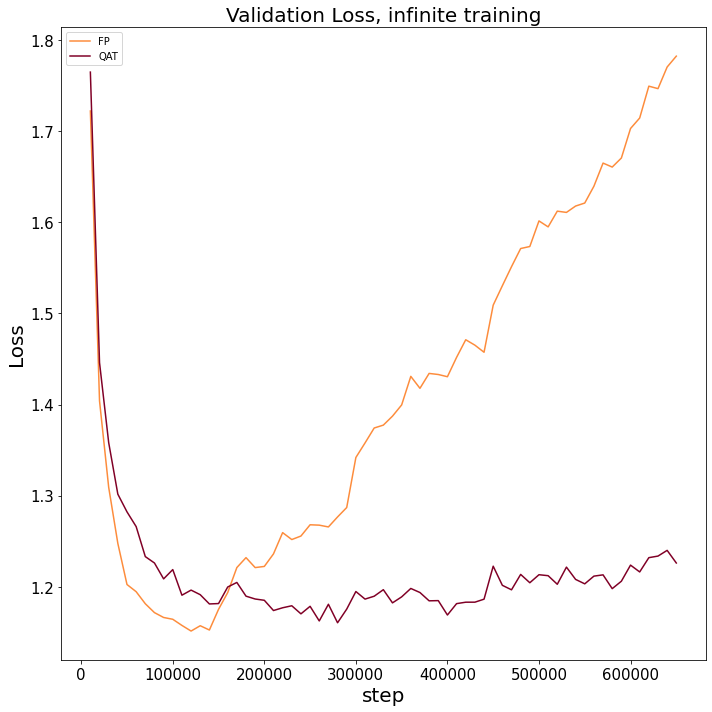

In [52]:
create_frame(ind,"Validation Loss, infinite training","infinite_train_in-domain_eval_loss.png",True,stepCols=False)

['FP' 'QAT']
['FP' 'QAT']


,step,FP,QAT
0,10000,4.548718,4.614042
1,20000,4.160565,4.175534
2,30000,4.080216,4.074044
3,40000,3.993634,4.044528
4,50000,4.015363,4.042777
...,...,...,...
60,610000,6.28441,4.652131
61,620000,6.316092,4.623612
62,630000,6.392005,4.645732
63,640000,6.434761,4.641699


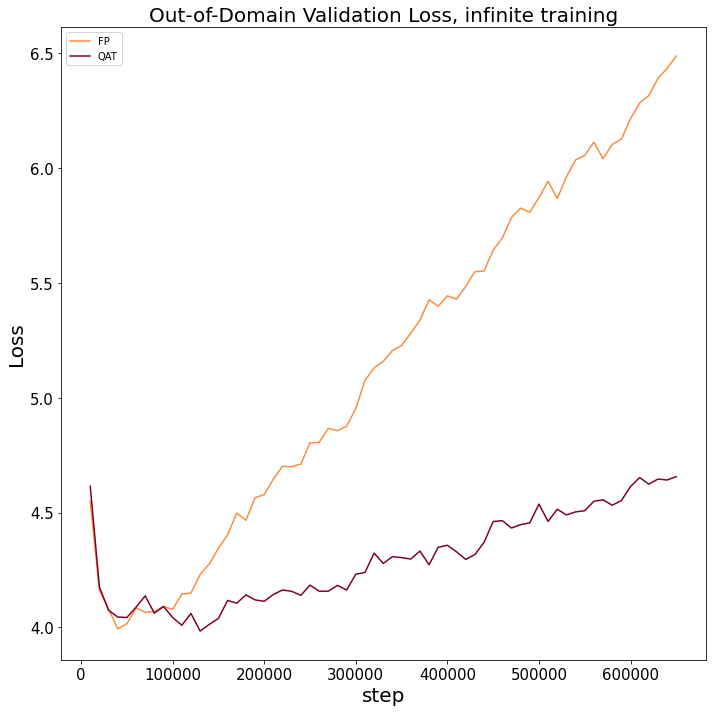

In [53]:
create_frame(outd,"Out-of-Domain Validation Loss, infinite training","infinite_train_out-domain_eval_loss.png",True,stepCols=False)

## What Fine-Tune params?

In [325]:
df = pd.read_json("find_learning-rate_fine-tune.json",orient="values")
df

,x,y,type,name
0,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[42.3625, 42.4216, 42.2937, 42.1557, 41.868, 4...",scattergl,eval_bleu (fineTuneFP EuP... (a67a3c623c8648))
1,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[28.4431, 27.9327, 28.7229, 27.3799, 27.9568, ...",scattergl,trainOpusFP_fineTuneEuParlFP_OpenSubs_eval_ble...
2,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[29.0094, 30.7655, 31.6725, 31.9056, 31.8057, ...",scattergl,eval_bleu (fineTuneQAT Eu... (21c948b92b9242))
3,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[19.6171, 20.0717, 20.0061, 19.175, 19.3151, 1...",scattergl,trainOpusFP_fineTuneEuParlQAT_OpenSubs_eval_bl...
4,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[38.1229, 37.5828, 36.1289, 37.0841, 36.4117, ...",scattergl,eval_bleu (fineTuneFP EuP... (cfede9481b8f44))
5,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[23.6614, 23.2102, 21.3024, 20.2891, 20.6261, ...",scattergl,trainOpusFP_fineTuneEuParlFP_OpenSubs_eval_ble...
6,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[28.9673, 29.0581, 30.0661, 30.1321, 31.0825, ...",scattergl,eval_bleu (fineTuneQAT Eu... (b8d650d4006a4e))
7,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[16.9135, 15.0834, 15.9438, 14.1064, 13.6981, ...",scattergl,trainOpusFP_fineTuneEuParlQAT_OpenSubs_eval_bl...
8,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0009000000000000001, 0.0009000000000000001,...",scattergl,eval_bleu (fineTuneFP EuP... (e1ab88d542d74a))
9,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0011, 0.0011, 0, 0.0011, 0.0011, 0, 0, 0, 0...",scattergl,trainOpusFP_fineTuneEuParlFP_OpenSubs_eval_ble...


In [326]:
df['experiment'] = df.name.apply(lambda x: re.sub(r".*\(.*\((.*)\)\)",r"\g<1>",x))

In [327]:
df

,x,y,type,name,experiment
0,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[42.3625, 42.4216, 42.2937, 42.1557, 41.868, 4...",scattergl,eval_bleu (fineTuneFP EuP... (a67a3c623c8648)),a67a3c623c8648
1,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[28.4431, 27.9327, 28.7229, 27.3799, 27.9568, ...",scattergl,trainOpusFP_fineTuneEuParlFP_OpenSubs_eval_ble...,a67a3c623c8648
2,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[29.0094, 30.7655, 31.6725, 31.9056, 31.8057, ...",scattergl,eval_bleu (fineTuneQAT Eu... (21c948b92b9242)),21c948b92b9242
3,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[19.6171, 20.0717, 20.0061, 19.175, 19.3151, 1...",scattergl,trainOpusFP_fineTuneEuParlQAT_OpenSubs_eval_bl...,21c948b92b9242
4,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[38.1229, 37.5828, 36.1289, 37.0841, 36.4117, ...",scattergl,eval_bleu (fineTuneFP EuP... (cfede9481b8f44)),cfede9481b8f44
5,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[23.6614, 23.2102, 21.3024, 20.2891, 20.6261, ...",scattergl,trainOpusFP_fineTuneEuParlFP_OpenSubs_eval_ble...,cfede9481b8f44
6,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[28.9673, 29.0581, 30.0661, 30.1321, 31.0825, ...",scattergl,eval_bleu (fineTuneQAT Eu... (b8d650d4006a4e)),b8d650d4006a4e
7,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[16.9135, 15.0834, 15.9438, 14.1064, 13.6981, ...",scattergl,trainOpusFP_fineTuneEuParlQAT_OpenSubs_eval_bl...,b8d650d4006a4e
8,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0009000000000000001, 0.0009000000000000001,...",scattergl,eval_bleu (fineTuneFP EuP... (e1ab88d542d74a)),e1ab88d542d74a
9,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0011, 0.0011, 0, 0.0011, 0.0011, 0, 0, 0, 0...",scattergl,trainOpusFP_fineTuneEuParlFP_OpenSubs_eval_ble...,e1ab88d542d74a


In [328]:
lr = pd.read_json("find_learning-rate_fine-tune-LR_max.json",orient="values")
lr = lr.drop(['x','type'],axis=1)
lr.y = lr.y.apply(lambda x: max(x))
lr.y = lr.y.apply(lambda x: "{:.0e}".format(x))
lr['LR'] = lr.y
lr['experiment'] = lr.name.apply(lambda x: re.sub(r".*.*\((.*)\)",r"\g<1>",x))
lr.drop(['y','name'],axis=1,inplace=True)
lr

,LR,experiment
0,2e-05,a67a3c623c8648
1,2e-05,21c948b92b9242
2,2e-04,cfede9481b8f44
3,2e-04,b8d650d4006a4e
4,2e-03,e1ab88d542d74a
5,2e-03,441b49aa863e4c
6,2e-04,0470774b623342
7,2e-04,5941bbce789d45


In [329]:
mg = pd.merge(df,lr,on='experiment')
mg.name = mg.name.apply(lambda x: re.sub(r".*fineTune([A-Z]+).*",r"\g<1>",x)+" "+ ("out-d" if re.search("OpenSubs",x)is not None else "in-d"))
mg.drop(['type'],axis=1,inplace=True)
mg['steps'] = mg.x.apply(lambda x: len(x))
mg

,x,y,name,experiment,LR,steps
0,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[42.3625, 42.4216, 42.2937, 42.1557, 41.868, 4...",FP in-d,a67a3c623c8648,2e-05,49
1,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[28.4431, 27.9327, 28.7229, 27.3799, 27.9568, ...",FP out-d,a67a3c623c8648,2e-05,49
2,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[29.0094, 30.7655, 31.6725, 31.9056, 31.8057, ...",QAT in-d,21c948b92b9242,2e-05,49
3,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[19.6171, 20.0717, 20.0061, 19.175, 19.3151, 1...",QAT out-d,21c948b92b9242,2e-05,49
4,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[38.1229, 37.5828, 36.1289, 37.0841, 36.4117, ...",FP in-d,cfede9481b8f44,2e-04,49
5,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[23.6614, 23.2102, 21.3024, 20.2891, 20.6261, ...",FP out-d,cfede9481b8f44,2e-04,49
6,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[28.9673, 29.0581, 30.0661, 30.1321, 31.0825, ...",QAT in-d,b8d650d4006a4e,2e-04,49
7,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[16.9135, 15.0834, 15.9438, 14.1064, 13.6981, ...",QAT out-d,b8d650d4006a4e,2e-04,49
8,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0009000000000000001, 0.0009000000000000001,...",FP in-d,e1ab88d542d74a,2e-03,49
9,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0011, 0.0011, 0, 0.0011, 0.0011, 0, 0, 0, 0...",FP out-d,e1ab88d542d74a,2e-03,49


In [330]:
frames = []
for i in mg.groupby(by=["LR",'steps']):
    frames.append(i)

In [331]:
frames[0][1]

,x,y,name,experiment,LR,steps
8,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0009000000000000001, 0.0009000000000000001,...",FP in-d,e1ab88d542d74a,2e-03,49
9,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0011, 0.0011, 0, 0.0011, 0.0011, 0, 0, 0, 0...",FP out-d,e1ab88d542d74a,2e-03,49
10,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0009000000000000001, 0.0009000000000000001,...",QAT in-d,441b49aa863e4c,2e-03,49
11,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0011, 0.0011, 0.0011, 0.0011, 0, 0, 0.0011,...",QAT out-d,441b49aa863e4c,2e-03,49


('2e-03', 49)
['QAT out-d' 'QAT in-d' 'FP out-d' 'FP in-d']
['FP in-d' 'FP out-d' 'QAT in-d' 'QAT out-d']
('2e-04', 49)
['FP in-d' 'QAT in-d' 'FP out-d' 'QAT out-d']
['FP in-d' 'FP out-d' 'QAT in-d' 'QAT out-d']
('2e-04', 99)
['FP in-d' 'QAT in-d' 'FP out-d' 'QAT out-d']
['FP in-d' 'FP out-d' 'QAT in-d' 'QAT out-d']
('2e-05', 49)
['FP in-d' 'QAT in-d' 'FP out-d' 'QAT out-d']
['FP in-d' 'FP out-d' 'QAT in-d' 'QAT out-d']


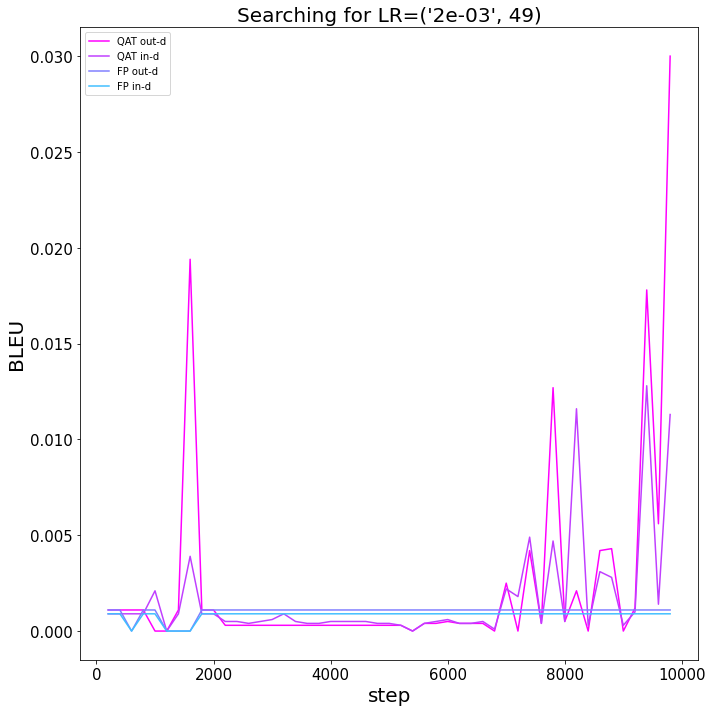

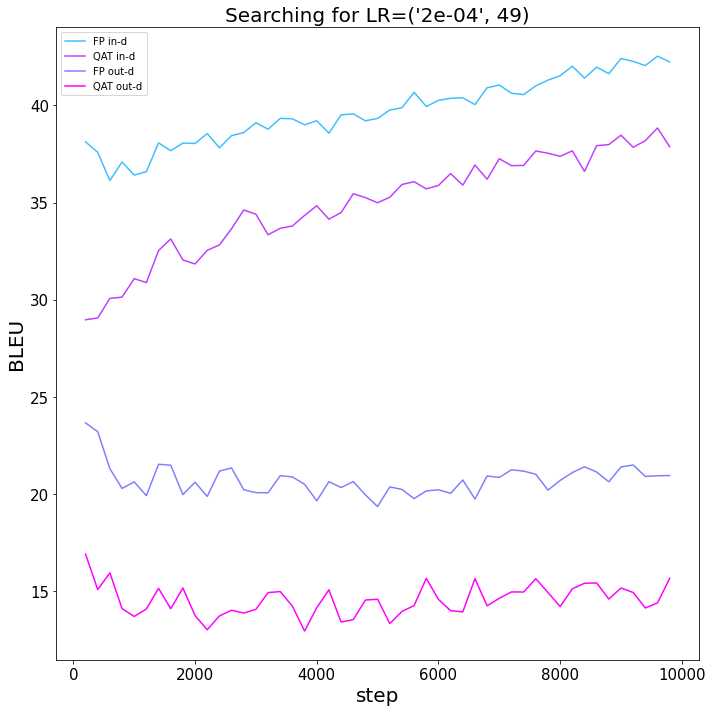

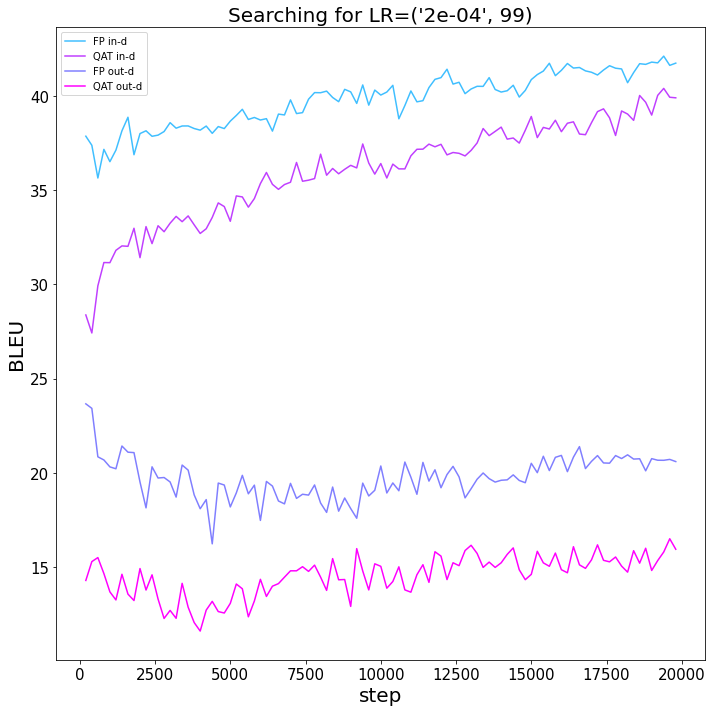

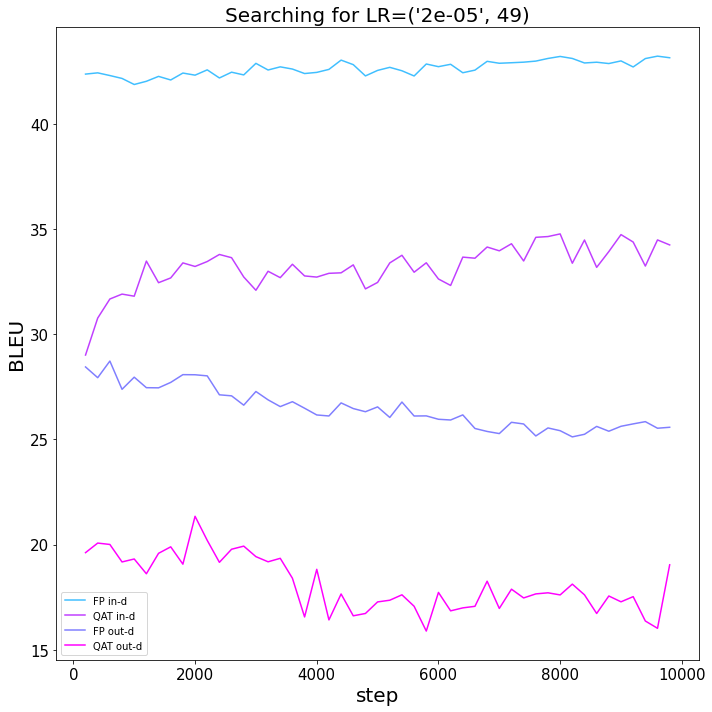

In [333]:
for i in frames:
    print(i[0])
    create_frame(i[1].reset_index(drop=True),f"Searching for LR={i[0]}",f"lr_search_{i[0]}.png",stepCols=False)

In [356]:
df = pd.read_json("find_learning-rate_fine-tune.json",orient="values")
df['experiment'] = df.name.apply(lambda x: re.sub(r".*\(.*\((.*)\)\)",r"\g<1>",x))
lr = pd.read_json("find_learning-rate_fine-tune-LR_max.json",orient="values")
lr = lr.drop(['x','type'],axis=1)
lr.y = lr.y.apply(lambda x: max(x))
lr.y = lr.y.apply(lambda x: "{:.0e}".format(x))
lr['LR'] = lr.y
lr['experiment'] = lr.name.apply(lambda x: re.sub(r".*.*\((.*)\)",r"\g<1>",x))
lr.drop(['y','name'],axis=1,inplace=True)
mg = pd.merge(df,lr,on='experiment')
mg.name = mg.name.apply(lambda x: re.sub(r".*fineTune([A-Z]+).*",r"\g<1>",x)+" "+ ("out-d" if re.search("OpenSubs",x)is not None else "in-d"))
mg.drop(['type'],axis=1,inplace=True)
mg['steps'] = mg.x.apply(lambda x: len(x))
mg


,x,y,name,experiment,LR,steps
0,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[42.3625, 42.4216, 42.2937, 42.1557, 41.868, 4...",FP in-d,a67a3c623c8648,2e-05,49
1,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[28.4431, 27.9327, 28.7229, 27.3799, 27.9568, ...",FP out-d,a67a3c623c8648,2e-05,49
2,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[29.0094, 30.7655, 31.6725, 31.9056, 31.8057, ...",QAT in-d,21c948b92b9242,2e-05,49
3,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[19.6171, 20.0717, 20.0061, 19.175, 19.3151, 1...",QAT out-d,21c948b92b9242,2e-05,49
4,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[38.1229, 37.5828, 36.1289, 37.0841, 36.4117, ...",FP in-d,cfede9481b8f44,2e-04,49
5,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[23.6614, 23.2102, 21.3024, 20.2891, 20.6261, ...",FP out-d,cfede9481b8f44,2e-04,49
6,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[28.9673, 29.0581, 30.0661, 30.1321, 31.0825, ...",QAT in-d,b8d650d4006a4e,2e-04,49
7,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[16.9135, 15.0834, 15.9438, 14.1064, 13.6981, ...",QAT out-d,b8d650d4006a4e,2e-04,49
8,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0009000000000000001, 0.0009000000000000001,...",FP in-d,e1ab88d542d74a,2e-03,49
9,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0011, 0.0011, 0, 0.0011, 0.0011, 0, 0, 0, 0...",FP out-d,e1ab88d542d74a,2e-03,49


In [357]:
one = mg[mg.steps==49].reset_index(drop=True)
two = mg[mg.steps==99].reset_index(drop=True)

In [358]:
one['name'] = one['name'] +" "+ one['LR']


In [359]:
one

,x,y,name,experiment,LR,steps
0,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[42.3625, 42.4216, 42.2937, 42.1557, 41.868, 4...",FP in-d 2e-05,a67a3c623c8648,2e-05,49
1,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[28.4431, 27.9327, 28.7229, 27.3799, 27.9568, ...",FP out-d 2e-05,a67a3c623c8648,2e-05,49
2,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[29.0094, 30.7655, 31.6725, 31.9056, 31.8057, ...",QAT in-d 2e-05,21c948b92b9242,2e-05,49
3,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[19.6171, 20.0717, 20.0061, 19.175, 19.3151, 1...",QAT out-d 2e-05,21c948b92b9242,2e-05,49
4,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[38.1229, 37.5828, 36.1289, 37.0841, 36.4117, ...",FP in-d 2e-04,cfede9481b8f44,2e-04,49
5,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[23.6614, 23.2102, 21.3024, 20.2891, 20.6261, ...",FP out-d 2e-04,cfede9481b8f44,2e-04,49
6,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[28.9673, 29.0581, 30.0661, 30.1321, 31.0825, ...",QAT in-d 2e-04,b8d650d4006a4e,2e-04,49
7,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[16.9135, 15.0834, 15.9438, 14.1064, 13.6981, ...",QAT out-d 2e-04,b8d650d4006a4e,2e-04,49
8,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0009000000000000001, 0.0009000000000000001,...",FP in-d 2e-03,e1ab88d542d74a,2e-03,49
9,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0011, 0.0011, 0, 0.0011, 0.0011, 0, 0, 0, 0...",FP out-d 2e-03,e1ab88d542d74a,2e-03,49


['FP in-d 2e-05' 'FP in-d 2e-04' 'QAT in-d 2e-04' 'QAT in-d 2e-05'
 'FP out-d 2e-05' 'FP out-d 2e-04' 'QAT out-d 2e-05' 'QAT out-d 2e-04'
 'QAT out-d 2e-03' 'QAT in-d 2e-03' 'FP out-d 2e-03' 'FP in-d 2e-03']
['FP in-d 2e-03' 'FP in-d 2e-04' 'FP in-d 2e-05' 'FP out-d 2e-03'
 'FP out-d 2e-04' 'FP out-d 2e-05' 'QAT in-d 2e-03' 'QAT in-d 2e-04'
 'QAT in-d 2e-05' 'QAT out-d 2e-03' 'QAT out-d 2e-04' 'QAT out-d 2e-05']


,step,FP in-d 2e-05,FP in-d 2e-04,QAT in-d 2e-04,QAT in-d 2e-05,FP out-d 2e-05,FP out-d 2e-04,QAT out-d 2e-05,QAT out-d 2e-04,QAT out-d 2e-03,QAT in-d 2e-03,FP out-d 2e-03,FP in-d 2e-03
0,200,42.3625,38.1229,28.9673,29.0094,28.4431,23.6614,19.6171,16.9135,0.0011,0.0009,0.0011,0.0009
1,400,42.4216,37.5828,29.0581,30.7655,27.9327,23.2102,20.0717,15.0834,0.0011,0.0009,0.0011,0.0009
2,600,42.2937,36.1289,30.0661,31.6725,28.7229,21.3024,20.0061,15.9438,0.0011,0.0009,0,0
3,800,42.1557,37.0841,30.1321,31.9056,27.3799,20.2891,19.175,14.1064,0.0011,0.0009,0.0011,0.0009
4,1000,41.868,36.4117,31.0825,31.8057,27.9568,20.6261,19.3151,13.6981,0,0.0021,0.0011,0.0009
5,1200,42.0204,36.584,30.8802,33.4749,27.4574,19.9156,18.6132,14.086,0,0,0,0
6,1400,42.2533,38.069,32.5285,32.4473,27.4502,21.5325,19.5846,15.1489,0.0011,0.0009,0,0
7,1600,42.0829,37.6646,33.1259,32.6746,27.7085,21.4816,19.893,14.0971,0.0194,0.0039,0,0
8,1800,42.4119,38.0583,32.0437,33.3884,28.0768,19.9708,19.0688,15.1656,0.0011,0.0009,0.0011,0.0009
9,2000,42.3117,38.0389,31.8379,33.2189,28.0719,20.6059,21.345,13.746,0.0011,0.0009,0.0011,0.0009


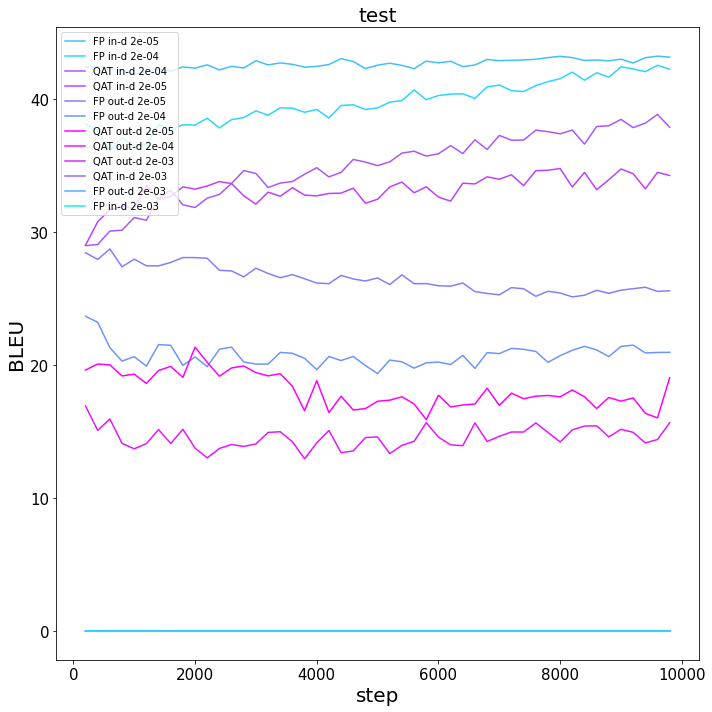

In [458]:
create_frame(one,"test","test",stepCols=False)

In [459]:
two

,x,y,name,experiment,LR,steps
0,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[37.8639, 37.3812, 35.644800000000004, 37.1652...",FP in-d,0470774b623342,2e-04,99
1,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[23.6606, 23.4205, 20.8492, 20.6827, 20.3151, ...",FP out-d,0470774b623342,2e-04,99
2,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[28.3773, 27.4219, 29.9237, 31.1591, 31.1522, ...",QAT in-d,5941bbce789d45,2e-04,99
3,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[14.288, 15.2889, 15.5016, 14.6549, 13.682, 13...",QAT out-d,5941bbce789d45,2e-04,99


['FP in-d' 'QAT in-d' 'FP out-d' 'QAT out-d']
['FP in-d' 'FP out-d' 'QAT in-d' 'QAT out-d']


,step,FP in-d,QAT in-d,FP out-d,QAT out-d
0,200,37.8639,28.3773,23.6606,14.288
1,400,37.3812,27.4219,23.4205,15.2889
2,600,35.6448,29.9237,20.8492,15.5016
3,800,37.1652,31.1591,20.6827,14.6549
4,1000,36.5124,31.1522,20.3151,13.682
...,...,...,...,...,...
94,19000,41.7954,38.9843,20.7524,14.8182
95,19200,41.7559,40.0311,20.6683,15.3428
96,19400,42.112,40.3998,20.6645,15.7974
97,19600,41.623,39.9306,20.7122,16.5006


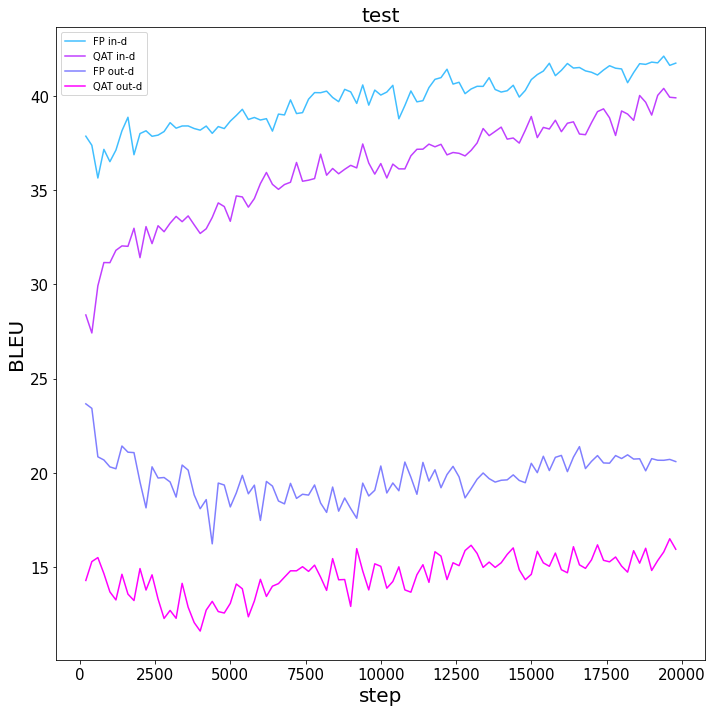

In [460]:
create_frame(two,"test","test",stepCols=False)

## Choose hyperparams (without out-domain)

In [54]:
df = pd.read_json("find_learning-rate_fine-tune.json",orient="values")
df['experiment'] = df.name.apply(lambda x: re.sub(r".*\(.*\((.*)\)\)",r"\g<1>",x))
lr = pd.read_json("find_learning-rate_fine-tune-LR_max.json",orient="values")
lr = lr.drop(['x','type'],axis=1)
lr.y = lr.y.apply(lambda x: max(x))
lr.y = lr.y.apply(lambda x: "{:.0e}".format(x))
lr['LR'] = lr.y
lr['experiment'] = lr.name.apply(lambda x: re.sub(r".*.*\((.*)\)",r"\g<1>",x))
lr.drop(['y','name'],axis=1,inplace=True)
mg = pd.merge(df,lr,on='experiment')
mg.name = mg.name.apply(lambda x: re.sub(r".*fineTune([A-Z]+).*",r"\g<1>",x)+" "+ ("out-d" if re.search("OpenSubs",x)is not None else "in-d"))
mg.drop(['type'],axis=1,inplace=True)
mg['steps'] = mg.x.apply(lambda x: len(x))
mg


,x,y,name,experiment,LR,steps
0,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[42.3625, 42.4216, 42.2937, 42.1557, 41.868, 4...",FP in-d,a67a3c623c8648,2e-05,49
1,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[28.4431, 27.9327, 28.7229, 27.3799, 27.9568, ...",FP out-d,a67a3c623c8648,2e-05,49
2,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[29.0094, 30.7655, 31.6725, 31.9056, 31.8057, ...",QAT in-d,21c948b92b9242,2e-05,49
3,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[19.6171, 20.0717, 20.0061, 19.175, 19.3151, 1...",QAT out-d,21c948b92b9242,2e-05,49
4,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[38.1229, 37.5828, 36.1289, 37.0841, 36.4117, ...",FP in-d,cfede9481b8f44,2e-04,49
5,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[23.6614, 23.2102, 21.3024, 20.2891, 20.6261, ...",FP out-d,cfede9481b8f44,2e-04,49
6,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[28.9673, 29.0581, 30.0661, 30.1321, 31.0825, ...",QAT in-d,b8d650d4006a4e,2e-04,49
7,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[16.9135, 15.0834, 15.9438, 14.1064, 13.6981, ...",QAT out-d,b8d650d4006a4e,2e-04,49
8,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0009000000000000001, 0.0009000000000000001,...",FP in-d,e1ab88d542d74a,2e-03,49
9,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0011, 0.0011, 0, 0.0011, 0.0011, 0, 0, 0, 0...",FP out-d,e1ab88d542d74a,2e-03,49


In [55]:
q_in = mg[mg.name.str.contains('QAT in-d')]
q_in

,x,y,name,experiment,LR,steps
2,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[29.0094, 30.7655, 31.6725, 31.9056, 31.8057, ...",QAT in-d,21c948b92b9242,2e-05,49
6,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[28.9673, 29.0581, 30.0661, 30.1321, 31.0825, ...",QAT in-d,b8d650d4006a4e,2e-04,49
10,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0009000000000000001, 0.0009000000000000001,...",QAT in-d,441b49aa863e4c,2e-03,49
14,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[28.3773, 27.4219, 29.9237, 31.1591, 31.1522, ...",QAT in-d,5941bbce789d45,2e-04,99


In [56]:
q_in['name'] = q_in.name + " " + q_in.LR
q_in1 = q_in[q_in.steps == 49].reset_index(drop=True)
q_in2 = q_in[q_in.steps == 99].reset_index(drop=True)

/var/folders/k1/c1fggdt142gd5xsrvnlk_kfw0000gn/T/ipykernel_91593/4101388524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_in['name'] = q_in.name + " " + q_in.LR


['QAT in-d 2e-04' 'QAT in-d 2e-05' 'QAT in-d 2e-03']
['QAT in-d 2e-03' 'QAT in-d 2e-04' 'QAT in-d 2e-05']


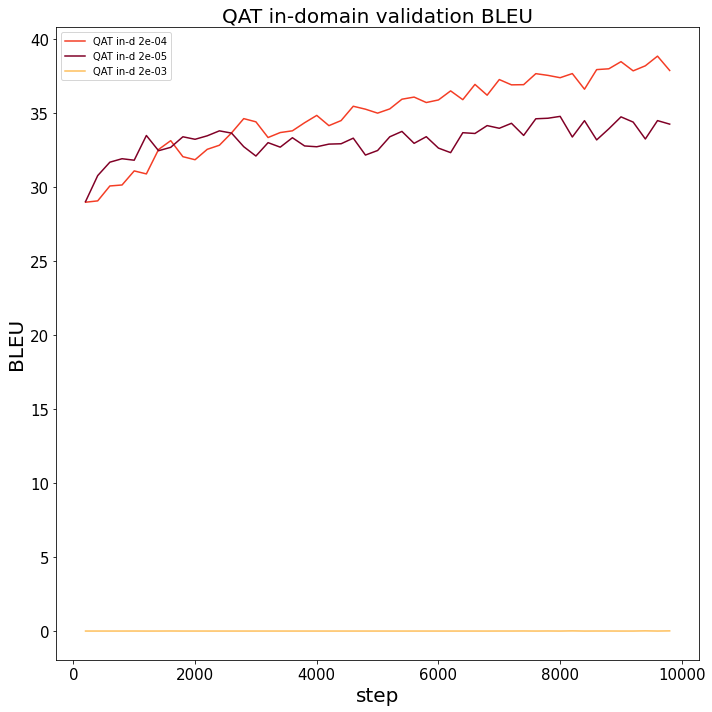

In [57]:
_ = create_frame(q_in1,"QAT in-domain validation BLEU","test",stepCols=False)

['QAT in-d 2e-04']
['QAT in-d 2e-04']


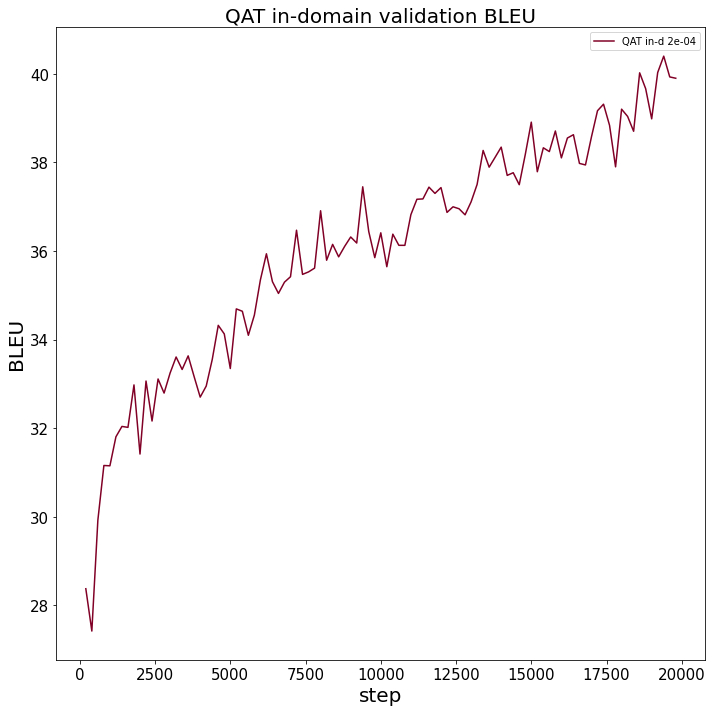

In [58]:
_ = create_frame(q_in2,"QAT in-domain validation BLEU","test",stepCols=False)

In [50]:
fp_in = mg[mg.name.str.contains('FP in-d')]
fp_in['name'] = fp_in.name + " " + fp_in.LR
fp_in1 = fp_in[fp_in.steps == 49].reset_index(drop=True)
fp_in2 = fp_in[fp_in.steps == 99].reset_index(drop=True)

/tmp/ipykernel_159/388391079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_in['name'] = fp_in.name + " " + fp_in.LR


['FP in-d 2e-05' 'FP in-d 2e-04' 'FP in-d 2e-03']
['FP in-d 2e-03' 'FP in-d 2e-04' 'FP in-d 2e-05']


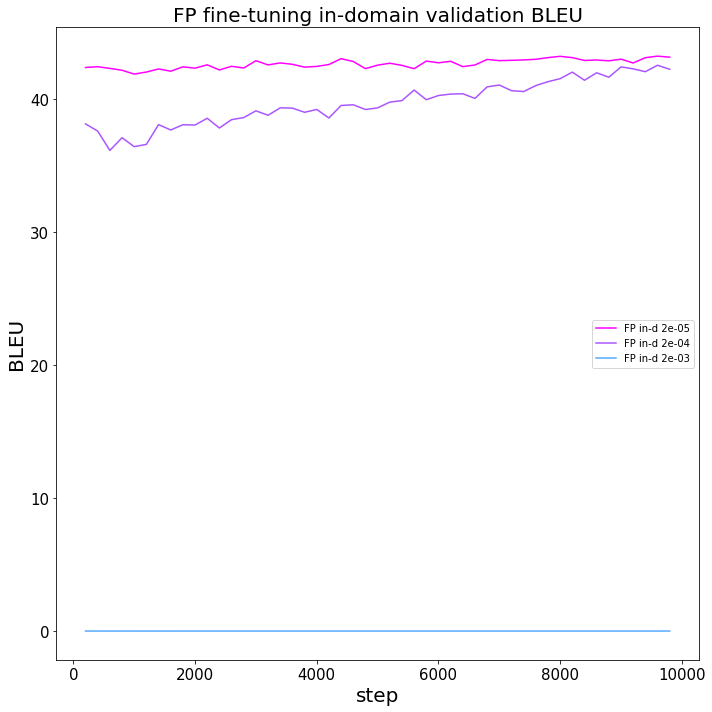

In [51]:
_ = create_frame(fp_in1,"FP fine-tuning in-domain validation BLEU","test",stepCols=False)

['FP in-d 2e-04']
['FP in-d 2e-04']


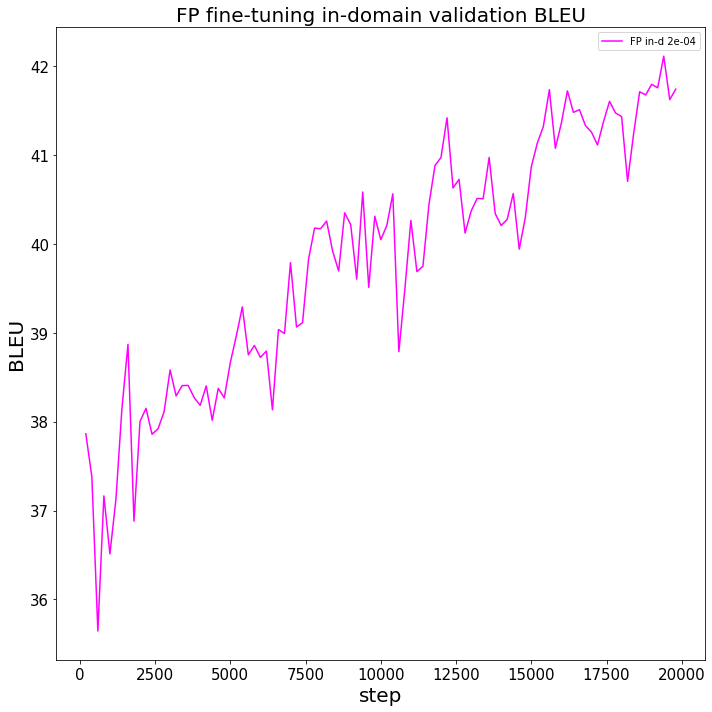

In [52]:
_ = create_frame(fp_in2,"FP fine-tuning in-domain validation BLEU","test",stepCols=False)

In [53]:
mg

,x,y,name,experiment,LR,steps
0,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[42.3625, 42.4216, 42.2937, 42.1557, 41.868, 4...",FP in-d,a67a3c623c8648,2e-05,49
1,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[28.4431, 27.9327, 28.7229, 27.3799, 27.9568, ...",FP out-d,a67a3c623c8648,2e-05,49
2,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[29.0094, 30.7655, 31.6725, 31.9056, 31.8057, ...",QAT in-d,21c948b92b9242,2e-05,49
3,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[19.6171, 20.0717, 20.0061, 19.175, 19.3151, 1...",QAT out-d,21c948b92b9242,2e-05,49
4,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[38.1229, 37.5828, 36.1289, 37.0841, 36.4117, ...",FP in-d,cfede9481b8f44,2e-04,49
5,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[23.6614, 23.2102, 21.3024, 20.2891, 20.6261, ...",FP out-d,cfede9481b8f44,2e-04,49
6,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[28.9673, 29.0581, 30.0661, 30.1321, 31.0825, ...",QAT in-d,b8d650d4006a4e,2e-04,49
7,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[16.9135, 15.0834, 15.9438, 14.1064, 13.6981, ...",QAT out-d,b8d650d4006a4e,2e-04,49
8,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0009000000000000001, 0.0009000000000000001,...",FP in-d,e1ab88d542d74a,2e-03,49
9,"[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1...","[0.0011, 0.0011, 0, 0.0011, 0.0011, 0, 0, 0, 0...",FP out-d,e1ab88d542d74a,2e-03,49


In [59]:
tab = mg.copy()
tab['name'] = tab.name + " " + tab.LR
tab['last'] = tab.y.apply(lambda x: x[-1])
tab.drop(['x','LR','y','experiment'],axis=1,inplace=True)
tab = tab[tab.name.str.contains('in-d')]
tab.sort_values(by="last",ascending=False)

,name,steps,last
0,FP in-d 2e-05,49,43.1392
4,FP in-d 2e-04,49,42.2300
12,FP in-d 2e-04,99,41.7407
14,QAT in-d 2e-04,99,39.9007
6,QAT in-d 2e-04,49,37.8669
2,QAT in-d 2e-05,49,34.2425
10,QAT in-d 2e-03,49,0.0113
8,FP in-d 2e-03,49,0.0009


## Comparisons

In [135]:
df = pd.read_json("compare_speed_euparl_test_samples_per_second_xeon.json",orient="values")
df

,x,y,type,name
0,[QAT_CPU_EuParl... (a120dfaab4cf4c)],[6.408],bar,QAT_CPU_EuParl... (a120dfaab4cf4c)
1,[DQ_CPU_EuParl ... (fe7c7d30e4c146)],[7.821],bar,DQ_CPU_EuParl ... (fe7c7d30e4c146)
2,[FP_CUDA_EuParl... (5978ee41dd8a4c)],[23.549],bar,FP_CUDA_EuParl... (5978ee41dd8a4c)
3,[FP_CPU_EuParl ... (b522285e21cd43)],[8.21],bar,FP_CPU_EuParl ... (b522285e21cd43)
4,[QAT_CPU_EuParl... (91d6286917d449)],[14.137],bar,QAT_CPU_EuParl... (91d6286917d449)
5,[DQ_CPU_EuParl ... (52abab8f645445)],[15.728],bar,DQ_CPU_EuParl ... (52abab8f645445)
6,[FP_CUDA_EuParl... (628cb5fd5dc548)],[46.255],bar,FP_CUDA_EuParl... (628cb5fd5dc548)
7,[FP_CPU_EuParl ... (54c53ee3870547)],[17.669],bar,FP_CPU_EuParl ... (54c53ee3870547)
8,[SQ_CPU_EuParl ...],[1.9849999999999999],bar,SQ_CPU_EuParl ...


In [136]:
df = df[['y','name']]
df.y = df.y.apply(lambda x: x[0])
batch_size = [ 8 if i < 4 else 32 for i in range(len(df.y))]
print(batch_size)
df['Batch size'] = batch_size
df

[8, 8, 8, 8, 32, 32, 32, 32, 32]


/var/folders/k1/c1fggdt142gd5xsrvnlk_kfw0000gn/T/ipykernel_11994/4223991085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.y = df.y.apply(lambda x: x[0])
/var/folders/k1/c1fggdt142gd5xsrvnlk_kfw0000gn/T/ipykernel_11994/4223991085.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Batch size'] = batch_size


,y,name,Batch size
0,6.408,QAT_CPU_EuParl... (a120dfaab4cf4c),8
1,7.821,DQ_CPU_EuParl ... (fe7c7d30e4c146),8
2,23.549,FP_CUDA_EuParl... (5978ee41dd8a4c),8
3,8.210,FP_CPU_EuParl ... (b522285e21cd43),8
4,14.137,QAT_CPU_EuParl... (91d6286917d449),32
5,15.728,DQ_CPU_EuParl ... (52abab8f645445),32
6,46.255,FP_CUDA_EuParl... (628cb5fd5dc548),32
7,17.669,FP_CPU_EuParl ... (54c53ee3870547),32
8,1.985,SQ_CPU_EuParl ...,32


In [137]:
df.name = df.name.apply(lambda x: re.sub(r"(.*)_(.*)_.*",r"\g<1> \g<2>",x))
df['Samples/second'] = df.y
df.drop(['y'],axis=1,inplace=True)
# df[['name','Samples/second']]
df

/var/folders/k1/c1fggdt142gd5xsrvnlk_kfw0000gn/T/ipykernel_11994/3274276081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name = df.name.apply(lambda x: re.sub(r"(.*)_(.*)_.*",r"\g<1> \g<2>",x))


,name,Batch size,Samples/second
0,QAT CPU,8,6.408
1,DQ CPU,8,7.821
2,FP CUDA,8,23.549
3,FP CPU,8,8.210
4,QAT CPU,32,14.137
5,DQ CPU,32,15.728
6,FP CUDA,32,46.255
7,FP CPU,32,17.669
8,SQ CPU,32,1.985


In [138]:
df = df.sort_values(by=['Batch size','Samples/second'],ascending=False)
df['Speed-Up'] = df['Samples/second'].div(df.groupby('Batch size')['Samples/second'].shift(1))
df = df.round(2)
df

,name,Batch size,Samples/second,Speed-Up
6,FP CUDA,32,46.26,NaN
7,FP CPU,32,17.67,0.38
5,DQ CPU,32,15.73,0.89
4,QAT CPU,32,14.14,0.90
8,SQ CPU,32,1.98,0.14
2,FP CUDA,8,23.55,NaN
3,FP CPU,8,8.21,0.35
1,DQ CPU,8,7.82,0.95
0,QAT CPU,8,6.41,0.82


In [139]:
df.to_csv("speed_comparison_xeon.csv",index=False)

In [13]:
df = pd.read_json('compare_speed_euparl_test_bleu_xeon.json',orient="values")
df = df[['y','name']]
df.y = df.y.apply(lambda x: x[0])
batch_size = [ 8 if i < 4 else 32 for i in range(len(df.y))]
print(batch_size)
df['Batch size'] = batch_size
df.name = df.name.apply(lambda x: re.sub(r"(.*)_(.*)_.*",r"\g<1> \g<2>",x))
df['test BLEU'] = df.y
df.drop(['y'],axis=1,inplace=True)
df = df.sort_values(by="test BLEU",ascending=False).round(2)
df.to_csv("in-d_bleu_comparison_xeon.csv",index=False)
df

[8, 8, 8, 8, 32, 32, 32, 32, 32]


,name,Batch size,test BLEU
4,QAT CPU,32,37.28
0,QAT CPU,8,37.28
2,FP CUDA,8,37.15
3,FP CPU,8,37.15
6,FP CUDA,32,37.15
7,FP CPU,32,37.15
1,DQ CPU,8,37.06
5,DQ CPU,32,37.04
8,SQ CPU,32,1.43


In [12]:
df = pd.read_json('compare_speed_opensubs_test_bleu_xeon.json',orient="values")
df = df[['y','name']]
df.y = df.y.apply(lambda x: x[0])
batch_size = [ 8 if i < 4 else 32 for i in range(len(df.y))]
print(batch_size)
df['Batch size'] = batch_size
df.name = df.name.apply(lambda x: re.sub(r"(.*)_(.*)_.*",r"\g<1> \g<2>",x))
df['test BLEU'] = df.y
df.drop(['y'],axis=1,inplace=True)
df = df.sort_values(by="test BLEU",ascending=False).round(2)
df.to_csv("out-d_bleu_comparison_xeon.csv",index=False)
df

[8, 8, 8, 8, 32, 32, 32, 32, 32]


,name,Batch size,test BLEU
2,FP CUDA,8,11.70
3,FP CPU,8,11.70
6,FP CUDA,32,11.70
7,FP CPU,32,11.70
5,DQ CPU,32,11.62
1,DQ CPU,8,11.59
4,QAT CPU,32,11.49
0,QAT CPU,8,11.49
8,SQ CPU,32,1.37


In [3]:
df = pd.read_json("compare_speed_euparl_test_samples_per_second_ryzen.json",orient="values")
df

,x,y,type,name
0,[QAT_CPU_EuParl...],[4.641],bar,QAT_CPU_EuParl...
1,[FP_CPU_EuParl ...],[2.935],bar,FP_CPU_EuParl ...
2,[DQ_CPU_EuParl ...],[5.411],bar,DQ_CPU_EuParl ...
3,[FP_CUDA_EuParl...],[16.248],bar,FP_CUDA_EuParl...


In [4]:
df = df[['y','name']]
df.y = df.y.apply(lambda x: x[0])
batch_size = [ 8 if i < 4 else 32 for i in range(len(df.y))]
print(batch_size)
df['Batch size'] = batch_size
df

[8, 8, 8, 8]


/var/folders/k1/c1fggdt142gd5xsrvnlk_kfw0000gn/T/ipykernel_28228/4223991085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.y = df.y.apply(lambda x: x[0])
/var/folders/k1/c1fggdt142gd5xsrvnlk_kfw0000gn/T/ipykernel_28228/4223991085.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Batch size'] = batch_size


,y,name,Batch size
0,4.641,QAT_CPU_EuParl...,8
1,2.935,FP_CPU_EuParl ...,8
2,5.411,DQ_CPU_EuParl ...,8
3,16.248,FP_CUDA_EuParl...,8


In [5]:
df.name = df.name.apply(lambda x: re.sub(r"(.*)_(.*)_.*",r"\g<1> \g<2>",x))
df['Samples/second'] = df.y
df.drop(['y'],axis=1,inplace=True)
# df[['name','Samples/second']]
df

/var/folders/k1/c1fggdt142gd5xsrvnlk_kfw0000gn/T/ipykernel_28228/3274276081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name = df.name.apply(lambda x: re.sub(r"(.*)_(.*)_.*",r"\g<1> \g<2>",x))


,name,Batch size,Samples/second
0,QAT CPU,8,4.641
1,FP CPU,8,2.935
2,DQ CPU,8,5.411
3,FP CUDA,8,16.248


In [8]:
df = df.sort_values(by=['Batch size','Samples/second'],ascending=False)
df['Speed-Up'] = df['Samples/second'].div(df.groupby('Batch size')['Samples/second'].shift(1))
df['Speed-Up vs Slower'] = df.groupby('Batch size')['Samples/second'].shift(1).div(df['Samples/second']).shift(-1)
df = df.round(2)
df

,name,Batch size,Samples/second,Speed-Up,Speed-Up vs Slower
3,FP CUDA,8,16.25,NaN,3.00
2,DQ CPU,8,5.41,0.33,1.17
0,QAT CPU,8,4.64,0.86,1.58
1,FP CPU,8,2.94,0.63,NaN


In [9]:
df.to_csv("speed_comparison_ryzen.csv",index=False)

In [11]:
df = pd.read_json('compare_speed_euparl_test_bleu_ryzen.json',orient="values")
df = df[['y','name']]
df.y = df.y.apply(lambda x: x[0])
batch_size = [ 8 if i < 4 else 32 for i in range(len(df.y))]
print(batch_size)
df['Batch size'] = batch_size
df.name = df.name.apply(lambda x: re.sub(r"(.*)_(.*)_.*",r"\g<1> \g<2>",x))
df['test BLEU'] = df.y
df.drop(['y'],axis=1,inplace=True)
df = df.sort_values(by="test BLEU",ascending=False).round(2)
df.to_csv("in-d_bleu_comparison_ryzen.csv",index=False)
df

[8, 8, 8, 8]


,name,Batch size,test BLEU
1,FP CPU,8,37.15
3,FP CUDA,8,37.15
2,DQ CPU,8,37.06
0,QAT CPU,8,36.37


In [14]:
df = pd.read_json('compare_speed_opensubs_test_bleu_ryzen.json',orient="values")
df = df[['y','name']]
df.y = df.y.apply(lambda x: x[0])
batch_size = [ 8 if i < 4 else 32 for i in range(len(df.y))]
print(batch_size)
df['Batch size'] = batch_size
df.name = df.name.apply(lambda x: re.sub(r"(.*)_(.*)_.*",r"\g<1> \g<2>",x))
df['test BLEU'] = df.y
df.drop(['y'],axis=1,inplace=True)
df = df.sort_values(by="test BLEU",ascending=False).round(2)
df.to_csv("out-d_bleu_comparison_ryzen.csv",index=False)
df

[8, 8]


,name,Batch size,test BLEU
0,FP CPU,8,11.70
1,DQ CPU,8,11.63
